In [ ]:
Series 和DataFrame都有一个用于生成各类图表的plot方法.默认情况下,他们所生成的都是线性图

In [1]:
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

## 线形图

Series图实例

In [4]:
import numpy as np

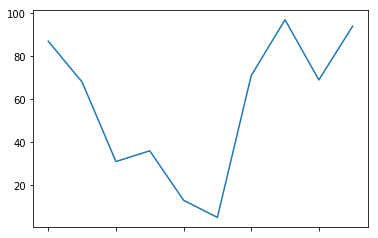

In [5]:
s = Series(np.random.randint(0,100,size=10),index = list('abcdefghij'))

s.plot()

DataFrame图表示例,plot()

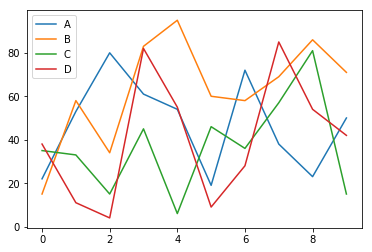

In [6]:
df = DataFrame(np.random.randint(0,100,size=(10,4)),columns=list('ABCD'))
df.plot()

## 柱状图

Series柱状图示例,kind = 'bar/barh'

dataframe柱状图示例

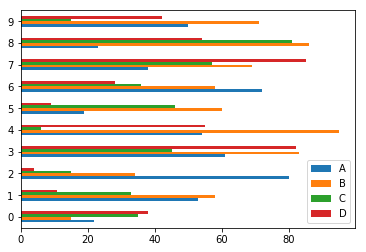

In [8]:
df.plot(kind = 'barh')

读取tips.csv文件,查看每天的聚会人数情况和每天各种聚会规模的比例  
使用df.sum(),进行求和并灵活使用axis

In [12]:
data = np.random.randint(0,100,size=(4,8))
columns = ['day',0,1,2,3,4,5,6]
df = DataFrame(data=data,columns=columns)
df

,day,0,1,2,3,4,5,6
0,70,36,95,10,34,23,68,93
1,26,96,93,97,22,79,72,21
2,65,92,44,24,11,89,21,59
3,80,47,12,34,83,34,26,17


In [16]:
df['day'] = ['Fri','Stat','Sun','Thur']
df

,day,0,1,2,3,4,5,6
0,Fri,36,95,10,34,23,68,93
1,Stat,96,93,97,22,79,72,21
2,Sun,92,44,24,11,89,21,59
3,Thur,47,12,34,83,34,26,17


In [17]:
df.set_index('day',inplace=True)
df

,0,1,2,3,4,5,6
day,,,,,,,
Fri,36,95,10,34,23,68,93
Stat,96,93,97,22,79,72,21
Sun,92,44,24,11,89,21,59
Thur,47,12,34,83,34,26,17


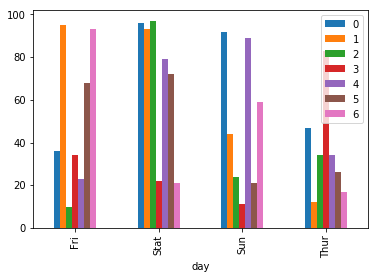

In [18]:
# 绘制柱状图
df.plot(kind = 'bar')

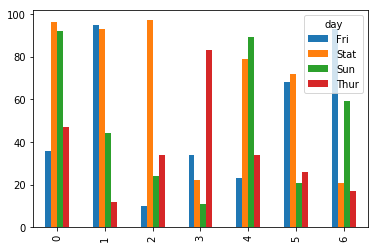

In [29]:
df.stack().unstack(level = 0).plot(kind = 'bar')

## 直方图

random生成随机数百分比直方图,调用hist方法

In [32]:
nd = np.random.randint(0,100,size = 100)
nd

array([72, 40, 34, 37, 72, 42, 77, 57,  8, 30,  4, 85, 66, 40, 77, 26, 70,
       66, 76, 29, 21, 71, 17, 72, 70, 71, 63, 56, 98, 77, 60, 45, 83, 16,
       94, 60, 63, 32, 96, 44, 29, 25,  9,  0, 27,  9, 29,  4, 19, 77, 85,
       54, 13, 24, 60,  5, 80, 81, 32, 17, 53, 72, 14, 85, 74, 40, 56, 93,
       42, 63, 51,  6, 27,  1,  8,  9, 80, 73, 68, 42, 88, 10, 82, 38, 47,
       76, 14, 31, 57, 26, 39, 54,  1, 53, 93, 70, 44, 59, 13, 53])

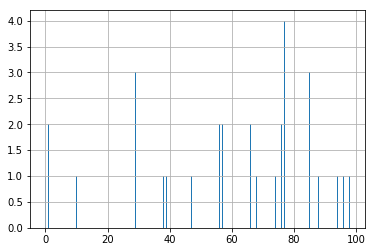

In [33]:
# 使用直方图来表示密度, 它是特殊的柱状图
s = Series(nd)
s.hist(bins = 1000)

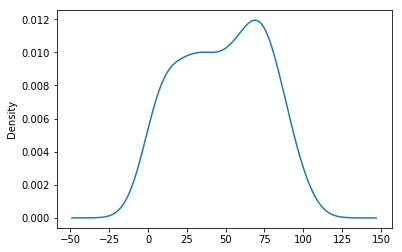

In [34]:
# 随机数百分比密度图s.plot(kind = 'kde')
s.plot(kind = 'kde' )

这两种图经常被画在一起.直方图以规格化形式给出(以便给出面元化密度),  
然后再在其上绘制核密度估计,接下来看一个由两个不同的标准正太分布组成的双峰分布

np.random.normal()正太分布函数  

直方图hist,函数中必须添加属性normed = True

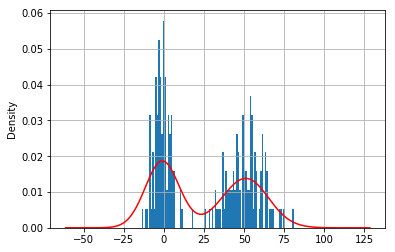

In [36]:
# 直方图和密度图绘制到一个图形中
n1 = np.random.normal(loc=0,scale=5,size=100)

n2 = np.random.normal(loc=50,scale=10,size=100)

nd = np.concatenate([n1,n2])

s = Series(nd)

# kde 密度图
s.plot(kind = 'kde', style = 'red')

# 绘制直方图
s.hist(normed = True,bins = 100)

### 散布图

散布图是观察两个一维数据数列之间的关系的有效方法  
注意使用kind='scatter',给明标签columns

In [5]:
df = DataFrame(np.random.randint(0,100,size = (50,4)),columns=list('ABCD'))
df

,A,B,C,D
0,42,90,49,67
1,6,36,70,14
2,76,68,2,41
3,50,77,69,28
4,77,7,28,57
5,36,41,3,73
6,60,12,67,21
7,16,9,40,65
8,32,65,56,55
9,63,16,7,93


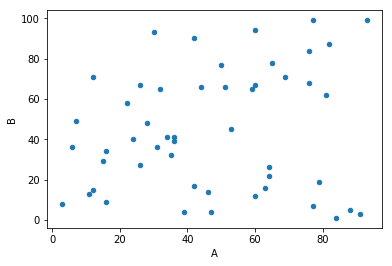

In [6]:
# scatter requires and x and y column
# A math_score B python_score
df.plot(x='A',y='B',kind = 'scatter')

散布图矩阵,当有多个点时,两两点的关系  
函数: pd.plotting.scatter_matrix(),注意参数diagnol:对角线


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025039E7DB00>,
      dtype=object)

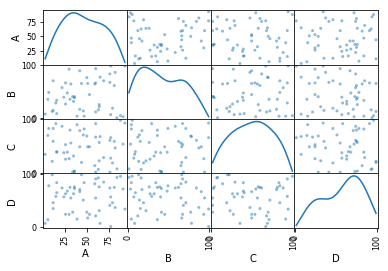

In [7]:
pd.plotting.scatter_matrix(df,diagonal='kde')
